# Patient average hospital visit duration +/- 5 hours using Poisson Distribution 

In [1]:
# Importing necessary libraries for data handling, visualization, and statistical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import pandas as pd  # For managing data
from scipy.stats import poisson  # For Poisson probability calculations

In [2]:
# Loading the hospital visits dataset from the specified file path
df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/hospital_visits.csv')

In [3]:
# Display the first five rows of the hospital visits dataset
df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia


In [4]:
# Converting START and STOP columns to datetime format for accurate time calculations
df['START'] = pd.to_datetime(df['START'])
df['STOP'] = pd.to_datetime(df['STOP'])

In [5]:
# Calculating the duration of hospital visits in hours
df['DURATION'] = (df['STOP'] - df['START']).dt.total_seconds() / 3600  

# Displaying the first few rows to check the new 'DURATION' column
df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,DURATION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN,3.533333
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN,0.284167
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,0.250000
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN,0.250000
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia,0.250000


In [6]:
# Displaying information about the dataset, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Id                   27891 non-null  object             
 1   START                27891 non-null  datetime64[ns, UTC]
 2   STOP                 27891 non-null  datetime64[ns, UTC]
 3   PATIENT              27891 non-null  object             
 4   ORGANIZATION         27891 non-null  object             
 5   PAYER                27891 non-null  object             
 6   ENCOUNTERCLASS       27891 non-null  object             
 7   CODE                 27891 non-null  int64              
 8   DESCRIPTION          27891 non-null  object             
 9   BASE_ENCOUNTER_COST  27891 non-null  float64            
 10  TOTAL_CLAIM_COST     27891 non-null  float64            
 11  PAYER_COVERAGE       27891 non-null  float64            
 12  REASONCODE        

In [7]:
# Computing the average hospital visit duration in hours
avg_duration = df['DURATION'].mean()  

# Printing the result
print(f"Average duration: {avg_duration:.2f} hours")  

Average duration: 7.27 hours


In [8]:
# Defining the range for Poisson distribution, centered around the average visit duration
k = range(int(avg_duration) - 5, int(avg_duration) + 6)  # +/- 5 hours from the average

In [9]:
# Computing the Poisson probabilities for durations within the defined range
probabilities = poisson.pmf(k, avg_duration)

In [10]:
# Printing Poisson probabilities for each duration within the defined range
print("Poisson probabilities for each k: ")
for duration, prob in zip(k, probabilities):
    print(f"{duration} hours: {prob:.4f}")  # Formatting probabilities to four decimal places

Poisson probabilities for each k: 
2 hours: 0.0184
3 hours: 0.0447
4 hours: 0.0812
5 hours: 0.1180
6 hours: 0.1428
7 hours: 0.1483
8 hours: 0.1347
9 hours: 0.1087
10 hours: 0.0790
11 hours: 0.0522
12 hours: 0.0316


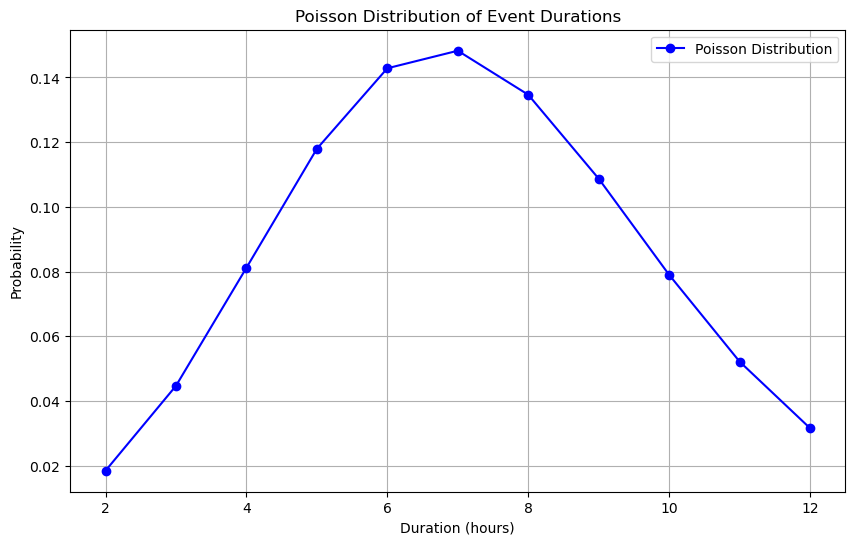

In [11]:
# Creating a plot for the Poisson distribution of event durations
plt.figure(figsize=(10, 6))  # Setting figure size for clear visualization

# Plotting the probability mass function (PMF)
plt.plot(k, probabilities, label="Poisson Distribution", marker='o', color='blue')  

# Adding labels and title
plt.xlabel("Duration (hours)")  # X-axis label
plt.ylabel("Probability")  # Y-axis label
plt.title("Poisson Distribution of Event Durations")  # Chart title

# Adding legend and grid for better readability
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()